# Day 2: Data Preprocessing

**Welcome to your 30-day ML journey!** Today we'll master the art of data preprocessing - transforming messy, real-world data into clean, ML-ready datasets. We'll cover missing value handling, feature scaling, and categorical encoding.

**Learning Objectives:**
- Understand why data preprocessing is crucial for ML success
- Master techniques for handling missing values
- Learn feature scaling and normalization methods
- Implement categorical encoding strategies
- Build a complete preprocessing pipeline

---


## Concept Overview

### Why Data Preprocessing Matters

Real-world data is messy. It contains missing values, inconsistent formats, and features with vastly different scales. **Data preprocessing** transforms raw data into a format that machine learning algorithms can effectively use.

**Key Benefits:**
- **Improves model performance**: Clean data leads to better predictions
- **Prevents bias**: Proper scaling ensures all features contribute equally
- **Handles real-world complexity**: Addresses common data quality issues
- **Enables algorithm compatibility**: Many algorithms require specific data formats

### The Three Pillars of Data Preprocessing

1. **Missing Value Handling**: What to do when data is incomplete
2. **Feature Scaling**: Ensuring features are on comparable scales
3. **Categorical Encoding**: Converting text/categories to numbers

### Real-World Examples

- **E-commerce**: Product prices (0-1000) vs. ratings (1-5) need scaling
- **Healthcare**: Missing lab results require careful handling
- **Marketing**: Customer segments ("Premium", "Basic") need encoding

---


## Code Demo

Let's work through a comprehensive preprocessing pipeline using a realistic dataset.


In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


### 1. Loading and Exploring the Dataset

We'll use a synthetic dataset that mimics real-world data quality issues.


In [2]:
# Create a realistic dataset with common preprocessing challenges
np.random.seed(42)
n_samples = 1000

# Generate data with intentional issues
data = {
    'age': np.random.normal(35, 12, n_samples),
    'income': np.random.lognormal(10, 0.5, n_samples),
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_samples, p=[0.3, 0.4, 0.25, 0.05]),
    'city_size': np.random.choice(['Small', 'Medium', 'Large'], n_samples, p=[0.4, 0.4, 0.2]),
    'satisfaction_score': np.random.uniform(1, 10, n_samples),
    'purchase_amount': np.random.exponential(100, n_samples)
}

df = pd.DataFrame(data)

# Introduce missing values (realistic patterns)
missing_indices = np.random.choice(df.index, size=int(0.1 * len(df)), replace=False)
df.loc[missing_indices, 'income'] = np.nan

missing_indices = np.random.choice(df.index, size=int(0.05 * len(df)), replace=False)
df.loc[missing_indices, 'education'] = np.nan

missing_indices = np.random.choice(df.index, size=int(0.08 * len(df)), replace=False)
df.loc[missing_indices, 'satisfaction_score'] = np.nan

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()


Dataset Shape: (1000, 6)

First 5 rows:


,age,income,education,city_size,satisfaction_score,purchase_amount
0,40.960570,44341.562353,Bachelor,Small,7.019889,29.770442
1,33.340828,NaN,High School,Medium,NaN,14.579077
2,42.772262,22693.077136,Bachelor,Large,9.394776,30.117001
3,53.276358,15939.117886,High School,Small,1.181241,48.622742
4,32.190160,NaN,Master,Medium,2.384053,286.440202


In [21]:
# Analyze data quality
print("\t\tData Quality Analysis:")
print("=" * 55)
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing data: {df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100:.2f}%")
print("\nMissing values by column:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

print("\nBasic statistics:")
df.describe()


		Data Quality Analysis:
Total missing values: 230
Percentage of missing data: 3.83%

Missing values by column:
age                     0
income                100
education              50
city_size               0
satisfaction_score     80
purchase_amount         0
dtype: int64

Data types:
age                   float64
income                float64
education              object
city_size              object
satisfaction_score    float64
purchase_amount       float64
dtype: object

Basic statistics:


,age,income,satisfaction_score,purchase_amount
count,1000.000000,900.000000,920.000000,1000.000000
mean,35.231985,25952.065064,5.492131,101.837398
std,11.750591,13675.454156,2.572945,103.722032
min,-3.895208,5063.461821,1.002043,0.392607
25%,27.228916,16292.640900,3.321899,27.889012
50%,35.303607,22876.369742,5.346250,69.781143
75%,42.775327,31780.236110,7.741583,142.342641
max,81.232778,108722.471788,9.989136,752.520344


### 2. Handling Missing Values

Missing values are one of the most common data quality issues. Let's explore different strategies.


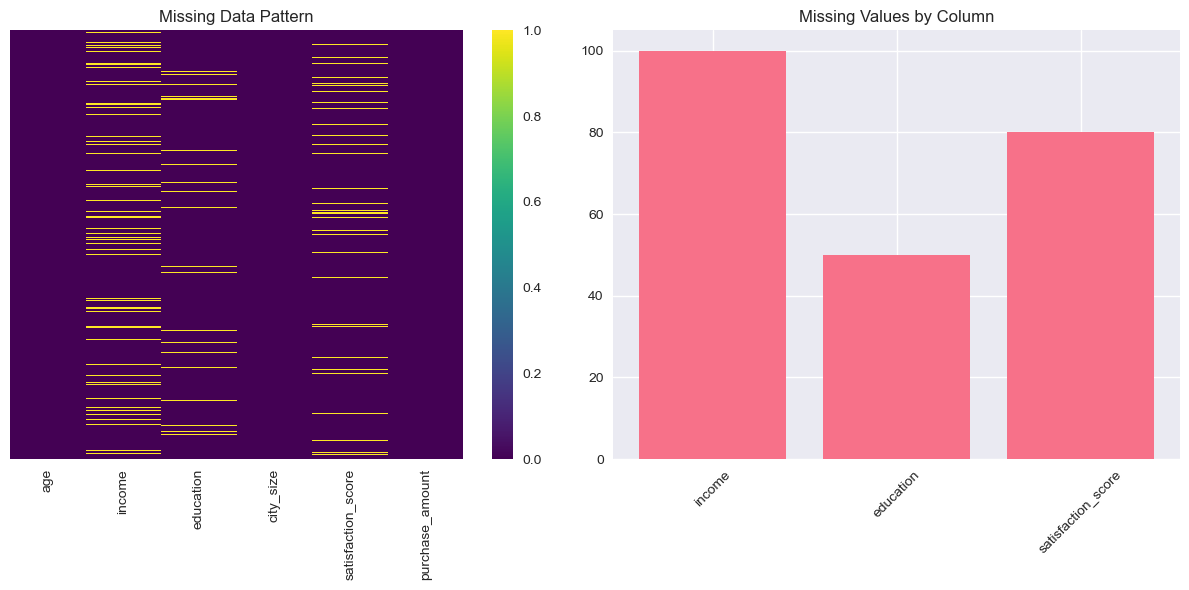

In [4]:
# Visualize missing data patterns
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Pattern')

plt.subplot(1, 2, 2)
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
plt.bar(missing_counts.index, missing_counts.values)
plt.title('Missing Values by Column')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Strategy 1: Simple Imputation

**When to use**: Quick solution, when missingness is random
- **Mean/Median**: For numerical features
- **Mode**: For categorical features


In [5]:
# Simple imputation strategies
df_simple = df.copy()

# Numerical features: use median (robust to outliers)
df_simple['income'].fillna(df_simple['income'].median(), inplace=True)
df_simple['satisfaction_score'].fillna(df_simple['satisfaction_score'].median(), inplace=True)

# Categorical features: use mode
df_simple['education'].fillna(df_simple['education'].mode()[0], inplace=True)

print("After simple imputation:")
print(f"Missing values: {df_simple.isnull().sum().sum()}")
print(f"\nEducation value counts:")
print(df_simple['education'].value_counts())


After simple imputation:
Missing values: 0

Education value counts:
education
Bachelor       417
High School    297
Master         234
PhD             52
Name: count, dtype: int64


#### Strategy 2: Advanced Imputation

**When to use**: When missingness might be informative or correlated with other features
- **KNN Imputation**: Uses similar records to estimate missing values
- **Iterative Imputation**: Uses other features to predict missing values


After KNN imputation:
Missing values: 0


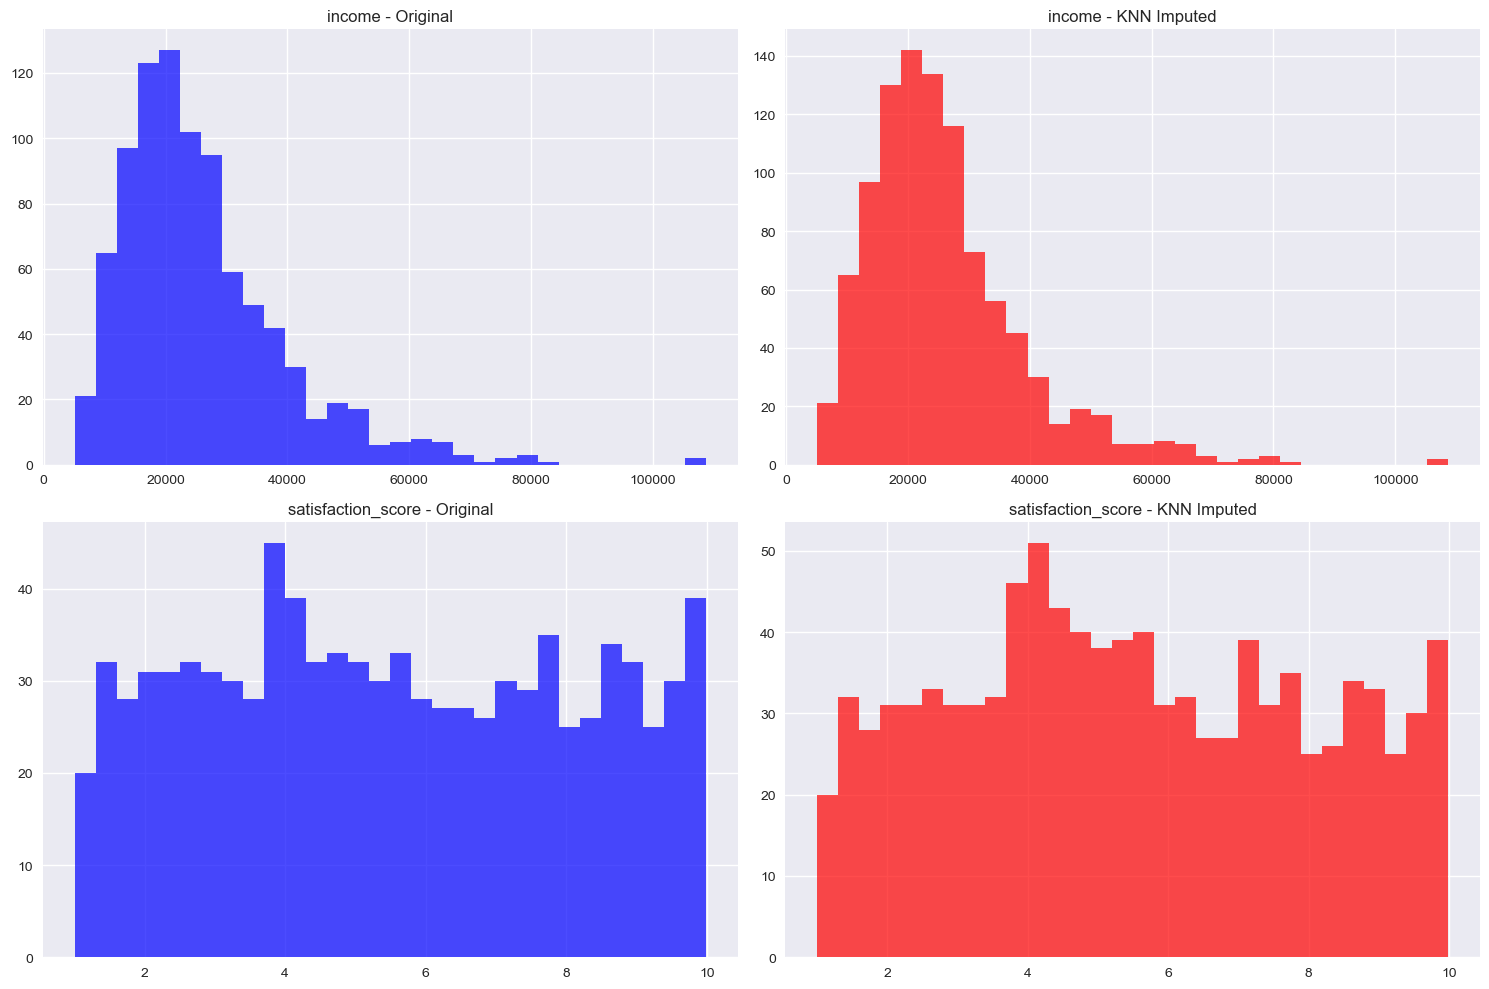

In [23]:
# KNN Imputation (more sophisticated)
from sklearn.impute import KNNImputer

df_knn = df.copy()

# Select numerical columns for KNN imputation
numerical_cols = ['age', 'income', 'satisfaction_score', 'purchase_amount']
df_numerical = df_knn[numerical_cols].copy()

# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_numerical_imputed = pd.DataFrame(
    knn_imputer.fit_transform(df_numerical),
    columns=numerical_cols,
    index=df_numerical.index
)

# Update the dataframe
df_knn[numerical_cols] = df_numerical_imputed

# Handle categorical missing values
df_knn['education'].fillna(df_knn['education'].mode()[0], inplace=True)

print("After KNN imputation:")
print(f"Missing values: {df_knn.isnull().sum().sum()}")

# Compare imputation results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(['income', 'satisfaction_score']):
    # Original data
    axes[i*2].hist(df[col].dropna(), bins=30, alpha=0.7, label='Original', color='blue')
    axes[i*2].set_title(f'{col} - Original')
    
    # KNN imputed data
    axes[i*2+1].hist(df_knn[col], bins=30, alpha=0.7, label='KNN Imputed', color='red')
    axes[i*2+1].set_title(f'{col} - KNN Imputed')

plt.tight_layout()
plt.show()


### 3. Feature Scaling

Different features often have vastly different scales. Scaling ensures all features contribute equally to the model.


Feature scales before scaling:
               age         income  satisfaction_score  purchase_amount
count  1000.000000    1000.000000         1000.000000      1000.000000
mean     35.231985   25992.387983            5.471420       101.837398
std      11.750591   13094.904047            2.491852       103.722032
min      -3.895208    5063.461821            1.002043         0.392607
25%      27.228916   16909.606378            3.537055        27.889012
50%      35.303607   23437.474958            5.275939        69.781143
75%      42.775327   31068.124393            7.549772       142.342641
max      81.232778  108722.471788            9.989136       752.520344


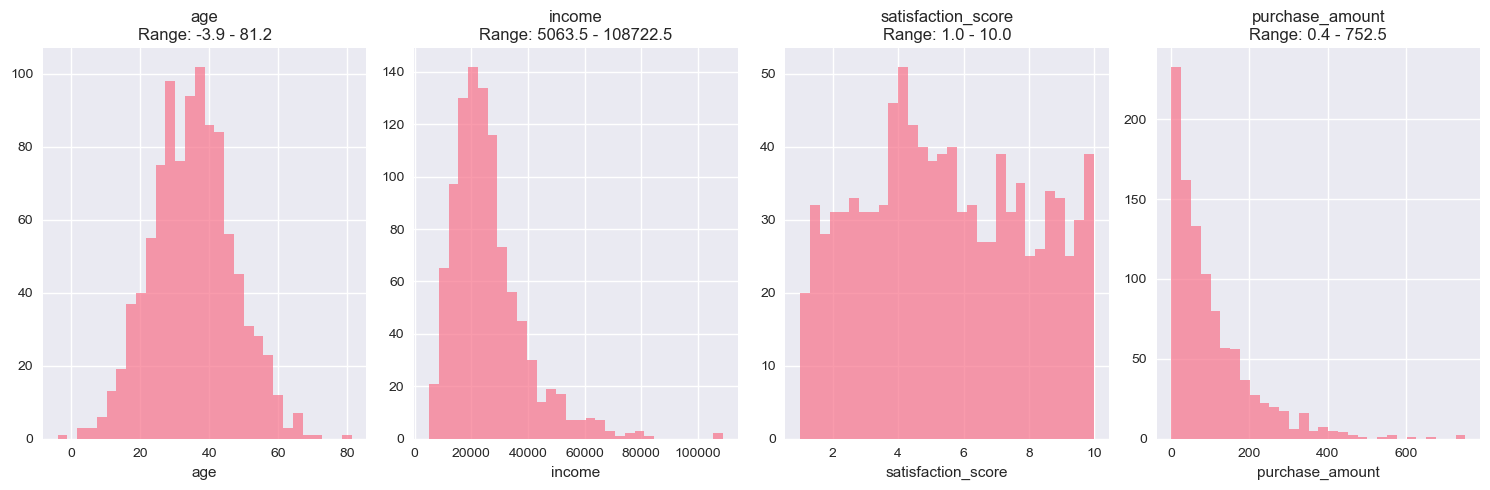

In [7]:
# Examine feature scales before scaling
numerical_features = ['age', 'income', 'satisfaction_score', 'purchase_amount']

print("Feature scales before scaling:")
print(df_knn[numerical_features].describe())

# Visualize the scale differences
plt.figure(figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, 4, i+1)
    plt.hist(df_knn[feature], bins=30, alpha=0.7)
    plt.title(f'{feature}\nRange: {df_knn[feature].min():.1f} - {df_knn[feature].max():.1f}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


### Understanding the Scale Differences - Why Scaling Matters

Looking at the output above, we can clearly see the dramatic scale differences between our features:

#### **Numeric Scale Analysis**

| Feature | Range | Mean | Standard Deviation |
|---------|--------|------|-------------------|
| **age** | -3.9 to 81.2 | ~35 | ~12 |
| **income** | 5,063 to 108,722 | ~26,000 | ~13,000 |
| **satisfaction_score** | 1.0 to 10.0 | ~5.5 | ~2.5 |
| **purchase_amount** | 0.4 to 752.5 | ~102 | ~104 |

#### **Why These Differences Are Problematic**

**1. Feature Dominance**
- Income values (thousands) completely overwhelm age values (tens)
- Without scaling, ML algorithms will treat a 1-unit change in income as 1000x more important than a 1-unit change in age
- This creates **artificial feature importance** based purely on scale, not actual predictive power

**2. Algorithm Impact**
- **Distance-based algorithms** (KNN, K-Means, SVM): Calculate distances using all features
  - Distance between two customers might be dominated entirely by income differences
  - Age and satisfaction differences become negligible in comparison
- **Gradient descent** (Neural Networks, Logistic Regression): Large-scale features cause large gradients
  - Training becomes unstable and slow to converge
  - May never find optimal solution

**3. Mathematical Example**
```
Customer A: age=25, income=30000, satisfaction=8
Customer B: age=30, income=35000, satisfaction=7

Without scaling:
Distance ≈ √[(25-30)² + (30000-35000)² + (8-7)²]
Distance ≈ √[25 + 25000000 + 1] ≈ 5000

The income difference (5000) completely dominates!
Age and satisfaction differences are essentially ignored.
```

#### **How Scaling Solves This**

After scaling, all features will have:
- **Similar ranges** (e.g., -3 to +3 for standardization, 0 to 1 for min-max)
- **Equal contribution** to distance calculations and gradient updates
- **Stable training** with faster convergence
- **Fair feature importance** based on actual predictive value, not scale

This is why the statement "scaling ensures all features contribute equally" is crucial for ML success!


#### **Standardization (Z-score normalization)**

**Formula**: (x - mean) / std
**Result**: Mean = 0, Std = 1 <br>
**When to use**: When data is approximately normally distributed


After Standardization:
                age        income  satisfaction_score  purchase_amount
count  1.000000e+03  1.000000e+03        1.000000e+03     1.000000e+03
mean   1.865175e-17 -1.314504e-16       -9.769963e-17     3.463896e-17
std    1.000500e+00  1.000500e+00        1.000500e+00     1.000500e+00
min   -3.331472e+00 -1.599049e+00       -1.794494e+00    -9.785342e-01
25%   -6.814187e-01 -6.939590e-01       -7.766646e-01    -7.133045e-01
50%    6.098290e-03 -1.952051e-01       -7.848733e-02    -3.092139e-01
75%    6.422755e-01  3.878055e-01        8.344767e-01     3.907127e-01
max    3.916723e+00  6.320892e+00        1.813903e+00     6.276473e+00


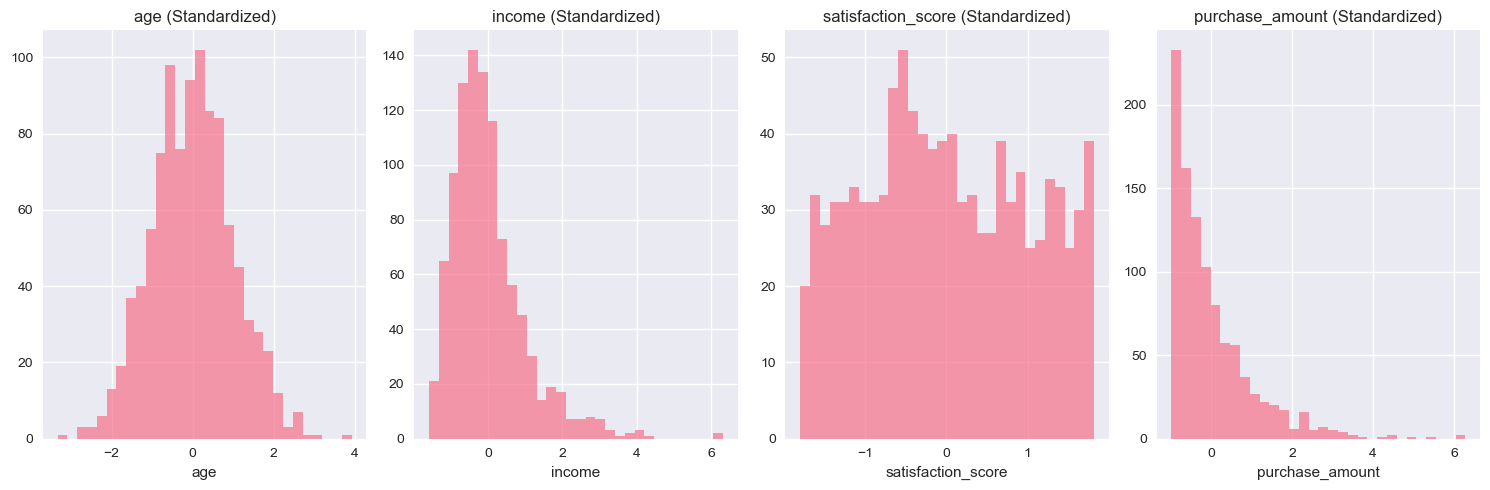

In [8]:
# Standardization
scaler_standard = StandardScaler()
df_standardized = df_knn.copy()

# Fit and transform numerical features
df_standardized[numerical_features] = scaler_standard.fit_transform(df_knn[numerical_features])

print("After Standardization:")
print(df_standardized[numerical_features].describe())

# Visualize standardized features
plt.figure(figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, 4, i+1)
    plt.hist(df_standardized[feature], bins=30, alpha=0.7)
    plt.title(f'{feature} (Standardized)')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


### **Standardization Results Analysis: Before vs After**

The standardization results above demonstrate the **dramatic transformation** that scaling achieves. Let's analyze the key differences:

#### **Statistical Transformation Comparison**

| Metric | **Before Scaling** | **After Standardization** | **Transformation** |
|--------|-------------------|---------------------------|-------------------|
| **Age Mean** | ~35.2 | ~0.0 (1.87e-17) | **Centered at zero** |
| **Income Mean** | ~25,992 | ~0.0 (-1.31e-16) | **Centered at zero** |
| **Age Std** | ~11.8 | ~1.0 (1.0005) | **Standardized to 1** |
| **Income Std** | ~13,095 | ~1.0 (1.0005) | **Standardized to 1** |
| **Age Range** | -3.9 to 81.2 | -3.33 to 3.92 | **Compressed ~6x** |
| **Income Range** | 5,063 to 108,722 | -1.60 to 6.32 | **Compressed ~13,000x** |

#### **Why This Transformation is Crucial**

**1. Equal Feature Contribution**
```
BEFORE: Customer similarity dominated by income
- Age difference: 30 vs 35 = 5 units
- Income difference: $30K vs $35K = 5,000 units
- Income is 1,000x more influential!

AFTER: All features contribute equally
- Age difference: -0.5 vs 0.0 = 0.5 standard deviations  
- Income difference: -0.3 vs 0.2 = 0.5 standard deviations
- Equal influence in distance calculations!
```

**2. Algorithm Stability & Performance**

**Distance-Based Models (KNN, SVM, K-Means)**
- **Before**: Distance = √[(age_diff)² + (income_diff)²] dominated by income
- **After**: Distance considers all features equally
- **Result**: More accurate similarity measurements

**Gradient Descent Optimization**
- **Before**: Income gradients ~1000x larger → unstable, slow convergence
- **After**: All gradients similar scale → stable, fast convergence
- **Result**: Better model training and performance

**3. Practical Model Benefits**

| Benefit | Before Scaling | After Scaling |
|---------|---------------|---------------|
| **Convergence Speed** | Slow (large gradients) | Fast (balanced gradients) |
| **Feature Importance** | Biased by scale | Based on actual predictive power |
| **Model Stability** | Unstable training | Stable, reproducible results |
| **Algorithm Compatibility** | Limited | Works with all ML algorithms |

#### **Visual Evidence from the Distributions**

The histograms show that after standardization:
- **All features have similar ranges** (-3 to +3 approximately)
- **All distributions are centered at zero**
- **Standard deviations are normalized to 1**
- **Shape of distributions preserved** (important for data integrity)

#### **Machine Learning Impact**

This standardization ensures:
1. **Fair feature competition** - no feature dominates due to scale
2. **Faster convergence** - optimization algorithms work efficiently  
3. **Better generalization** - models learn true patterns, not scale artifacts
4. **Algorithm flexibility** - can use any ML algorithm without scale concerns

**Bottom Line**: The transformation from vastly different scales (age: ~35, income: ~26K) to standardized scales (both: mean=0, std=1) is what enables machine learning algorithms to work effectively with real-world data!


#### **Min-Max Scaling**

**Formula**: (x - min) / (max - min) <br>
**Result**: Values between 0 and 1 <br>
**When to use**: When you need bounded values or when data has outliers


After Min-Max Scaling:
               age       income  satisfaction_score  purchase_amount
count  1000.000000  1000.000000         1000.000000      1000.000000
mean      0.459628     0.201902            0.497311         0.134877
std       0.138034     0.126327            0.277270         0.137905
min       0.000000     0.000000            0.000000         0.000000
25%       0.365616     0.114280            0.282073         0.036558
50%       0.460469     0.177254            0.475559         0.092256
75%       0.548240     0.250867            0.728570         0.188731
max       1.000000     1.000000            1.000000         1.000000


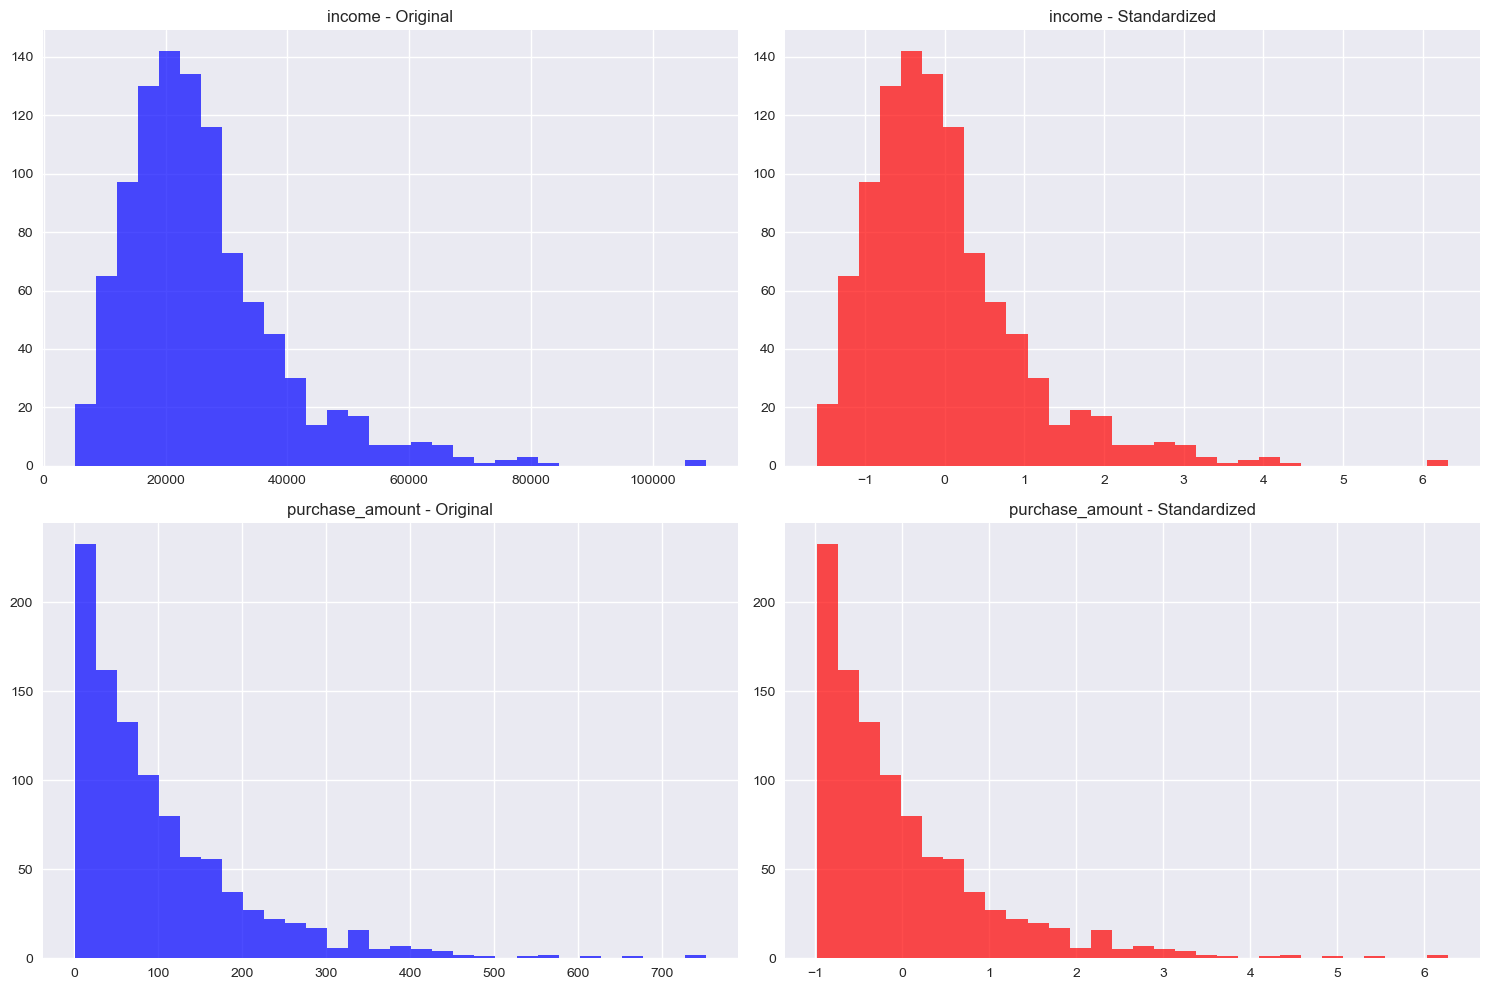

In [9]:
# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax = df_knn.copy()

# Fit and transform numerical features
df_minmax[numerical_features] = scaler_minmax.fit_transform(df_knn[numerical_features])

print("After Min-Max Scaling:")
print(df_minmax[numerical_features].describe())

# Compare scaling methods
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(['income', 'purchase_amount']):
    # Original
    axes[i*2].hist(df_knn[feature], bins=30, alpha=0.7, label='Original', color='blue')
    axes[i*2].set_title(f'{feature} - Original')
    
    # Standardized
    axes[i*2+1].hist(df_standardized[feature], bins=30, alpha=0.7, label='Standardized', color='red')
    axes[i*2+1].set_title(f'{feature} - Standardized')

plt.tight_layout()
plt.show()


### Min-Max Scaling Results Analysis: Transforming Data to [0,1] Range

The Min-Max scaling results demonstrate a **complete range transformation** that's fundamentally different from standardization. Let's analyze this powerful scaling technique:

#### **Complete Range Transformation Comparison**

| Feature | **Before Scaling** | **After Min-Max Scaling** | **Transformation** |
|---------|-------------------|---------------------------|-------------------|
| **Age Range** | -3.9 to 81.2 (span: ~85) | 0.0 to 1.0 (span: 1.0) | **Compressed to [0,1]** |
| **Income Range** | 5,063 to 108,722 (span: ~103K) | 0.0 to 1.0 (span: 1.0) | **Compressed to [0,1]** |
| **Satisfaction Range** | 1.0 to 10.0 (span: 9.0) | 0.0 to 1.0 (span: 1.0) | **Compressed to [0,1]** |
| **Purchase Range** | 0.4 to 752.5 (span: ~752) | 0.0 to 1.0 (span: 1.0) | **Compressed to [0,1]** |

#### **Key Statistical Insights**

**Perfect Boundary Constraints:**
- **Minimum values**: ALL features now have min = 0.000000
- **Maximum values**: ALL features now have max = 1.000000
- **Range uniformity**: Every feature spans exactly the same range [0,1]

**Preserved Relative Relationships:**
- **Age mean**: 0.46 → ~46% of the way through age range
- **Income mean**: 0.20 → ~20% of the way through income range  
- **Satisfaction mean**: 0.50 → ~50% of the way through satisfaction range
- **Purchase mean**: 0.13 → ~13% of the way through purchase range

#### **Why Min-Max Scaling is Crucial**

**1. Perfect Feature Equality**
```
BEFORE: Massive scale differences
- Age: values like 35, 45, 55
- Income: values like 25000, 35000, 45000
- Income dominates by 1000x!

AFTER: Perfect equality  
- Age: values like 0.4, 0.5, 0.6
- Income: values like 0.2, 0.3, 0.4
- All features contribute equally!
```

**2. Algorithm-Specific Benefits**

**Neural Networks & Deep Learning:**
- **Activation functions** (sigmoid, tanh) work optimally with [0,1] inputs
- **Gradient flow** remains stable throughout the network
- **Weight initialization** strategies work as designed

**Distance-Based Algorithms (KNN, K-Means, SVM):**
- **Euclidean distance** calculations are perfectly balanced
- **No feature dominance** due to scale differences
- **Cluster quality** dramatically improves

**Optimization Algorithms:**
- **Gradient descent** converges faster with similar feature scales
- **Learning rate** can be set uniformly for all features
- **Numerical stability** prevents overflow/underflow issues

#### **Practical Scenarios Where Min-Max Scaling Excels**

**1. Image Processing & Computer Vision**
- **Pixel values** naturally fit [0,1] range
- **Neural networks** expect normalized inputs
- **Color channels** (RGB) work best in [0,1]

**2. Recommendation Systems**  
- **User ratings** (1-5 stars) → [0,1] scale
- **Product features** with different units need normalization
- **Similarity calculations** require equal feature weights

**3. Financial Modeling**
- **Stock prices** vs **trading volumes** have vastly different scales
- **Risk metrics** need to be comparable across features
- **Portfolio optimization** requires balanced feature contributions

**4. IoT & Sensor Data**
- **Temperature** (°C) vs **Humidity** (%) vs **Pressure** (hPa)
- **Real-time processing** benefits from bounded [0,1] values
- **Anomaly detection** works better with normalized ranges

#### **Min-Max vs Standardization: When to Use Each**

| Scenario | **Use Min-Max Scaling** | **Use Standardization** |
|----------|------------------------|------------------------|
| **Data Distribution** | Any distribution | Approximately normal |
| **Outlier Sensitivity** | Sensitive to outliers | Robust to outliers |
| **Output Range** | Need bounded [0,1] | Need mean=0, std=1 |
| **Algorithm Type** | Neural networks, image processing | Statistical models, PCA |
| **Interpretability** | Easy (% of range) | Moderate (std deviations) |

#### **Real-World Impact**

**Before Min-Max Scaling:**
- Customer similarity dominated by income differences
- Neural networks struggle with varying input scales
- Distance calculations biased toward large-scale features

**After Min-Max Scaling:**
- All features contribute proportionally to model decisions
- Neural networks train efficiently with stable gradients
- Distance-based algorithms find meaningful patterns

**Bottom Line**: Min-Max scaling's [0,1] transformation ensures **perfect feature equality** and **algorithm compatibility**, making it the go-to choice for neural networks, image processing, and any scenario requiring bounded, interpretable feature values!

### **Common Scaling Techniques: A Practical Guide**

While we've explored StandardScaler and MinMaxScaler in detail, there are several other scaling methods that data scientists commonly use. Each has its own strengths and ideal use cases:


#### **RobustScaler**
**What it does**: Uses median and interquartile range instead of mean and standard deviation <br>
**Formula**: (x - median) / IQR <br>
**Result**: Centered around median, scaled by IQR <br>
**Best for**: Data with outliers, when you want to preserve the majority of your data. <br>
**Intuition**: Like using the "middle 50%" of your data as the reference point 

#### **MaxAbsScaler**
**What it does**: Scales by the maximum absolute value <br>
**Formula**: x / max(|x|) <br>
**Result**: Values between -1 and 1 <br>
**Best for**: Sparse data, when you want to preserve zero values and sign <br>
**Intuition**: Like making the largest value in your data equal to 1 (or -1) <br>

#### **QuantileTransformer**
**What it does**: Maps data to a uniform or normal distribution <br>
**Result**: Perfectly uniform or normal distribution <br>
**Best for**: When you need to transform non-normal data to normal distribution <br>
**Intuition**: Like rearranging your data to follow a specific pattern <br>

#### **PowerTransformer (Box-Cox, Yeo-Johnson)**
**What it does**: Applies power transformations to make data more normal <br>
**Result**: More normally distributed data <br>
**Best for**: Skewed data that needs to be more symmetric <br>
**Intuition**: Like stretching or compressing parts of your data to balance it out <br>

#### **When to Choose Each Method**

**Choose RobustScaler when**:
- Your data has outliers that you want to ignore
- You're not sure about the distribution of your data
- You want a more conservative scaling approach

**Choose MaxAbsScaler when**:
- Your data is sparse (many zeros)
- You want to preserve the sign of your values
- You're working with data that naturally spans both positive and negative values

**Choose QuantileTransformer when**:
- You need to transform your data to a specific distribution
- Your data is highly non-normal and you need it to be normal
- You want to remove the effects of outliers completely

**Choose PowerTransformer when**:
- Your data is skewed and you want to make it more symmetric
- You need to satisfy normality assumptions for statistical tests
- You want to reduce the impact of extreme values

#### **Quick Decision Tree**
1. **Need bounded values?** → MinMaxScaler or MaxAbsScaler
2. **Have outliers?** → RobustScaler
3. **Data is normal?** → StandardScaler
4. **Data is skewed?** → PowerTransformer
5. **Need specific distribution?** → QuantileTransformer
6. **Sparse data?** → MaxAbsScaler

The key is understanding your data's characteristics and your algorithm's requirements. Most of the time, StandardScaler or MinMaxScaler will serve you well, but having these alternatives in your toolkit ensures you can handle any scaling challenge that comes your way.


### **4. Categorical Encoding**

Machine learning algorithms work with numbers, not text. We need to convert categorical data to numerical format.


In [10]:
# Examine categorical features
categorical_features = ['education', 'city_size']

print("Categorical features analysis:")
for feature in categorical_features:
    print(f"\n{feature}:")
    print(df_knn[feature].value_counts())
    print(f"Unique values: {df_knn[feature].nunique()}")


Categorical features analysis:

education:
education
Bachelor       417
High School    297
Master         234
PhD             52
Name: count, dtype: int64
Unique values: 4

city_size:
city_size
Small     412
Medium    401
Large     187
Name: count, dtype: int64
Unique values: 3


#### **Label Encoding**

**When to use**: Ordinal categories (e.g., "Low", "Medium", "High") <br>
**Result**: Single column with integer values


In [11]:
# Label Encoding for ordinal data
df_labeled = df_knn.copy()

# Create ordinal mapping for education
education_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
df_labeled['education_encoded'] = df_labeled['education'].map(education_mapping)

print("Education Label Encoding:")
print(df_labeled[['education', 'education_encoded']].head(10))
print(f"\nEducation mapping: {education_mapping}")


Education Label Encoding:
     education  education_encoded
0     Bachelor                  2
1  High School                  1
2     Bachelor                  2
3  High School                  1
4       Master                  3
5       Master                  3
6  High School                  1
7          PhD                  4
8     Bachelor                  2
9  High School                  1

Education mapping: {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}


#### **One-Hot Encoding**

**When to use**: Nominal categories (e.g., "Red", "Blue", "Green") <br>
**Result**: Multiple binary columns (one per category)


In [12]:
# One-Hot Encoding for nominal data
df_onehot = df_knn.copy()

# One-hot encode city_size
city_dummies = pd.get_dummies(df_onehot['city_size'], prefix='city')
df_onehot = pd.concat([df_onehot, city_dummies], axis=1)

print("One-Hot Encoding for city_size:")
print(f"Original categories: {df_knn['city_size'].unique()}")
print(f"\nNew columns: {list(city_dummies.columns)}")
print(f"\nFirst 5 rows:")
print(df_onehot[['city_size'] + list(city_dummies.columns)].head())


One-Hot Encoding for city_size:
Original categories: ['Small' 'Medium' 'Large']

New columns: ['city_Large', 'city_Medium', 'city_Small']

First 5 rows:
  city_size  city_Large  city_Medium  city_Small
0     Small       False        False        True
1    Medium       False         True       False
2     Large        True        False       False
3     Small       False        False        True
4    Medium       False         True       False


### **5. Complete Preprocessing Pipeline**

Now let's build a professional preprocessing pipeline that handles everything automatically.


In [13]:
# Create a complete preprocessing pipeline
def create_preprocessing_pipeline():
    """
    Create a comprehensive preprocessing pipeline
    """
    
    # Define feature types
    numerical_features = ['age', 'income', 'satisfaction_score', 'purchase_amount']
    categorical_features = ['education', 'city_size']
    
    # Create preprocessing steps
    numerical_transformer = Pipeline(steps=[
        ('imputer', KNNImputer(n_neighbors=5)),
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first', sparse_output=False))
    ])
    
    # Combine transformers
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    
    return preprocessor, numerical_features, categorical_features

# Create and fit the pipeline
preprocessor, num_features, cat_features = create_preprocessing_pipeline()

# Fit and transform the data
X_processed = preprocessor.fit_transform(df)

print(f"Original shape: {df.shape}")
print(f"Processed shape: {X_processed.shape}")
print(f"\nProcessed data type: {type(X_processed)}")
print(f"Processed data range: {X_processed.min():.3f} to {X_processed.max():.3f}")


Original shape: (1000, 6)
Processed shape: (1000, 9)

Processed data type: <class 'numpy.ndarray'>
Processed data range: -3.331 to 6.321


In [14]:
# Get feature names after preprocessing
feature_names = (num_features + 
                list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_features)))

print("Feature names after preprocessing:")
for i, name in enumerate(feature_names):
    print(f"{i+1:2d}. {name}")

# Create a DataFrame for easier analysis
df_processed = pd.DataFrame(X_processed, columns=feature_names, index=df.index)

print(f"\nProcessed DataFrame shape: {df_processed.shape}")
print("\nFirst 5 rows:")
df_processed.head()


Feature names after preprocessing:
 1. age
 2. income
 3. satisfaction_score
 4. purchase_amount
 5. education_High School
 6. education_Master
 7. education_PhD
 8. city_size_Medium
 9. city_size_Small

Processed DataFrame shape: (1000, 9)

First 5 rows:


,age,income,satisfaction_score,purchase_amount,education_High School,education_Master,education_PhD,city_size_Medium,city_size_Small
0,0.487759,1.401947,0.621724,-0.695156,0.0,0.0,0.0,0.0,1.0
1,-0.161022,0.171149,-0.235011,-0.841692,1.0,0.0,0.0,1.0,0.0
2,0.642015,-0.252080,1.575262,-0.691813,0.0,0.0,0.0,0.0,0.0
3,1.536382,-0.768108,-1.722545,-0.513307,1.0,0.0,0.0,0.0,1.0
4,-0.258995,0.495999,-1.239605,1.780674,0.0,1.0,0.0,1.0,0.0


### 6. Train-Test Split with Preprocessing

**Critical**: Always split data BEFORE fitting preprocessing to prevent data leakage.


In [15]:
# Create a target variable for demonstration
np.random.seed(42)
y = np.random.choice([0, 1], size=len(df), p=[0.7, 0.3])

# Split data BEFORE preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training target distribution: {np.bincount(y_train)}")
print(f"Test target distribution: {np.bincount(y_test)}")

# Fit preprocessing on training data only
preprocessor_final, _, _ = create_preprocessing_pipeline()
X_train_processed = preprocessor_final.fit_transform(X_train)
X_test_processed = preprocessor_final.transform(X_test)

print(f"\nTraining data after preprocessing: {X_train_processed.shape}")
print(f"Test data after preprocessing: {X_test_processed.shape}")
print(f"\nTraining data range: {X_train_processed.min():.3f} to {X_train_processed.max():.3f}")
print(f"Test data range: {X_test_processed.min():.3f} to {X_test_processed.max():.3f}")


Training set size: 800
Test set size: 200
Training target distribution: [570 230]
Test target distribution: [142  58]

Training data after preprocessing: (800, 9)
Test data after preprocessing: (200, 9)

Training data range: -3.319 to 6.448
Test data range: -2.488 to 5.298


---

## Hands-on Exercise

### Exercise 1: Missing Value Analysis

**Task**: Analyze the missing value patterns in the dataset and choose appropriate imputation strategies.

**Hints**:
- Check if missing values are random or systematic
- Consider the data type when choosing imputation method
- Compare different imputation strategies


In [16]:
# TODO: Complete this exercise
# 1. Create a function to analyze missing value patterns
# 2. Implement different imputation strategies
# 3. Compare the results

def analyze_missing_patterns(df):
    """
    Analyze missing value patterns in the dataset
    """
    # Your code here
    pass

def compare_imputation_strategies(df, column):
    """
    Compare different imputation strategies for a given column
    """
    # Your code here
    pass

# Test your functions
# analyze_missing_patterns(df)
# compare_imputation_strategies(df, 'income')


### Exercise 2: Feature Scaling Comparison

**Task**: Compare the impact of different scaling methods on model performance.

**Hints**:
- Use a simple classifier (e.g., Logistic Regression)
- Compare StandardScaler vs MinMaxScaler
- Measure performance using accuracy score


In [17]:
# TODO: Complete this exercise
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def compare_scaling_methods(X_train, X_test, y_train, y_test):
    """
    Compare different scaling methods on model performance
    """
    # Your code here
    pass

# Test your function
# compare_scaling_methods(X_train_processed, X_test_processed, y_train, y_test)


### Exercise 3: Categorical Encoding Best Practices

**Task**: Implement different categorical encoding strategies and analyze their impact.

**Hints**:
- Compare Label Encoding vs One-Hot Encoding
- Consider the cardinality of categorical features
- Handle high-cardinality features appropriately


In [ ]:
# TODO: Complete this exercise
def compare_encoding_methods(df, categorical_columns):
    """
    Compare different categorical encoding methods
    """
    # Your code here
    pass

# Test your function
# compare_encoding_methods(df, ['education', 'city_size'])


### Exercise 4: Complete Pipeline Implementation

**Task**: Build a complete preprocessing pipeline that can be easily reused.

**Hints**:
- Use sklearn's Pipeline and ColumnTransformer
- Make the pipeline configurable
- Add validation and error handling


In [ ]:
# TODO: Complete this exercise
class DataPreprocessor:
    """
    A comprehensive data preprocessing class
    """
    
    def __init__(self, numerical_features, categorical_features):
        # Your code here
        pass
    
    def fit_transform(self, X):
        # Your code here
        pass
    
    def transform(self, X):
        # Your code here
        pass

# Test your class
# preprocessor = DataPreprocessor(['age', 'income'], ['education', 'city_size'])
# X_processed = preprocessor.fit_transform(df)


---

## Takeaways + Next Steps

### Key Takeaways

1. **Data Quality is Critical**: Clean, well-preprocessed data is the foundation of successful ML models

2. **Missing Value Strategies**:
   - Simple imputation for quick solutions
   - Advanced methods (KNN, Iterative) for better accuracy
   - Always consider the missingness pattern

3. **Feature Scaling Matters**:
   - Standardization for normally distributed data
   - Min-Max scaling for bounded values
   - Essential for distance-based algorithms

4. **Categorical Encoding**:
   - Label encoding for ordinal data
   - One-hot encoding for nominal data
   - Consider cardinality and model requirements

5. **Pipeline Best Practices**:
   - Always split data before fitting preprocessing
   - Use sklearn's Pipeline for reproducibility
   - Validate your preprocessing steps

### Common Pitfalls to Avoid

- **Data Leakage**: Fitting preprocessing on the entire dataset
- **Inappropriate Scaling**: Using the wrong scaling method for your data
- **Over-encoding**: Creating too many features from high-cardinality categories
- **Ignoring Missing Patterns**: Not analyzing why data is missing

### Next Steps

1. **Practice with Real Datasets**:
   - Kaggle competitions with messy data
   - UCI Machine Learning Repository
   - Your own domain-specific datasets

2. **Advanced Preprocessing Techniques**:
   - Feature engineering and selection
   - Outlier detection and treatment
   - Dimensionality reduction (PCA, t-SNE)

3. **Production Considerations**:
   - Automated preprocessing pipelines
   - Data validation and monitoring
   - Handling new categories in production

### Further Learning Resources

- **Books**: "Hands-On Machine Learning" by Aurélien Géron
- **Courses**: Coursera's "Machine Learning" by Andrew Ng
- **Documentation**: [Scikit-learn Preprocessing Guide](https://scikit-learn.org/stable/modules/preprocessing.html)
- **Practice**: [Kaggle Learn](https://www.kaggle.com/learn) - Data Cleaning course

### Tomorrow's Preview

**Day 3: EDA Best Practices** - We'll learn how to explore and visualize data effectively to gain insights and identify patterns before building models.

---

*Remember: Good data preprocessing is often the difference between a mediocre model and an excellent one. Take the time to understand your data and choose appropriate preprocessing strategies.*


## 📫 Let's Connect
- 💼 **LinkedIn:** [hashirahmed07](https://www.linkedin.com/in/hashirahmed07/)
- 📧 **Email:** [Hashirahmad330@gmail.com](mailto:Hashirahmad330@gmail.com)
- 🐙 **GitHub:** [CodeByHashir](https://github.com/CodeByHashir)